In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def delta_n(t, tau, R, delta_n0):
    return delta_n0 / (1 + (1 + R * delta_n0 * tau) * (np.exp(t / tau) - 1))

def delta_n_paper(t, tau, alpha, beta, t0=0):
    exp = np.exp(-(t - t0) / tau)
    return alpha * exp / (beta * tau * (1 - exp) + 1)

In [24]:
# Resonator bandwidth
f_r = 1070e6
Q = 68400
1 / (f_r / (2 * Q))

0.00012785046728971963

In [3]:
# Fit values from paper
beta_rise = 11000
beta_fall = -11000
tau_rise = 67e-6
tau_fall = 68e-6

In [22]:
(1 / tau_rise - 1 / tau_fall) / 2

109.7453906935907

In [4]:
abs(beta_rise * tau_rise)

0.737

In [5]:
abs(beta_fall * tau_fall)

0.748

In [6]:
t = np.linspace(0, 1e-3, 10000)

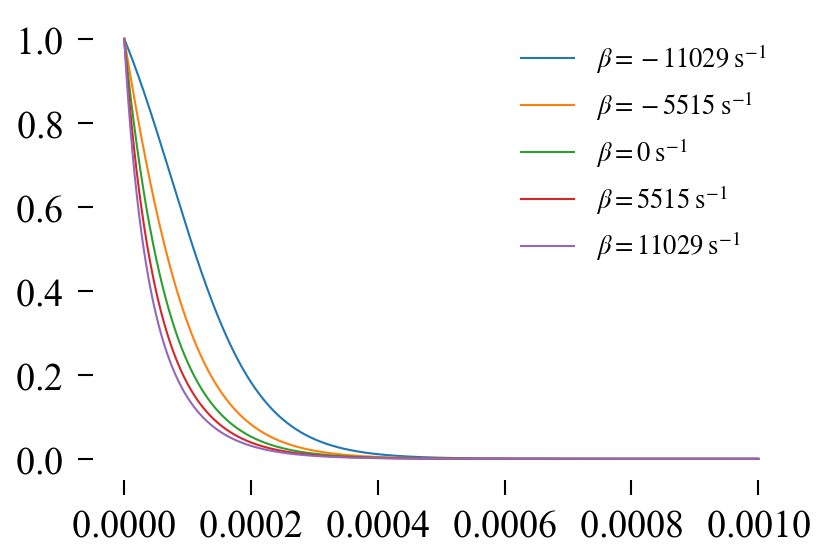

In [19]:
betas = np.linspace(-0.75, 0.75, 5) / tau_fall
fig, ax = plt.subplots()
for beta in betas:
    ax.plot(t, delta_n_paper(t=t, tau=tau_fall, alpha=1, beta=beta, t0=0), label=r'$\beta = {:.0f} \; \mathrm{{s}}^{{-1}}$'.format(beta))
ax.legend(fontsize='xx-small')

In [ ]:
# Analysis using only the fit relaxation times.
tau_fall = 110e-6  # s
tau_rise = 57e-6
R_delta_n0_tau = (1 / tau_rise - 1 / tau_fall) / 2
delta_n0_over_n_fall = tau_fall * R_delta_n0_tau
R = 7.8  # um3 / s; this is close to the upper bound
delta_n0_tau = R_delta_n0_tau / R
n_fall_tau = delta_n0_tau / delta_n0_over_n_fall

In [16]:
delta_n0_tau

541.8558050136998

In [17]:
n_fall_tau

1165.5011655011656

In [18]:
R * delta_n0_tau

4226.475279106858

$\tau^{-1} = 2 R \bar{n} + S$

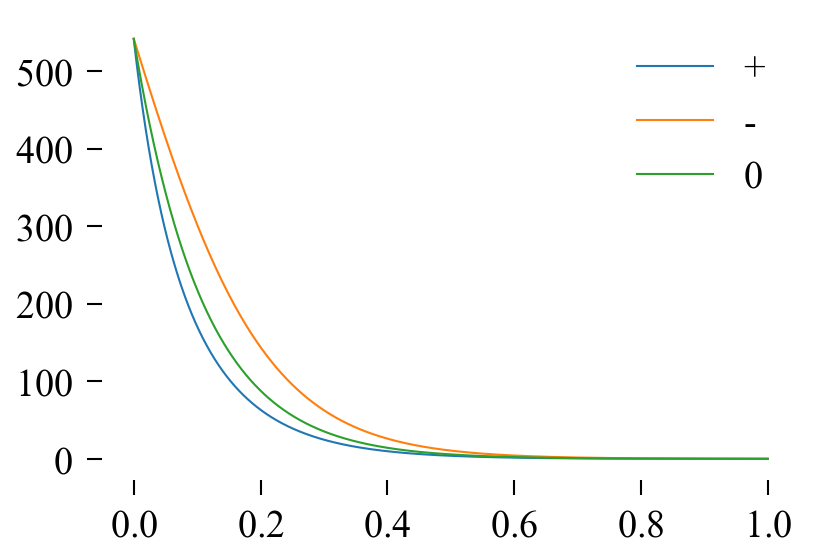

In [19]:
fig, ax = plt.subplots()
ax.plot(1e3 * t, delta_n(t, tau_fall, R, delta_n0_tau), label='+')
ax.plot(1e3 * t, delta_n(t, tau_fall, -R, delta_n0_tau), label='-')
ax.plot(1e3 * t, delta_n(t, tau_fall, 0, delta_n0_tau), label='0')
ax.legend()

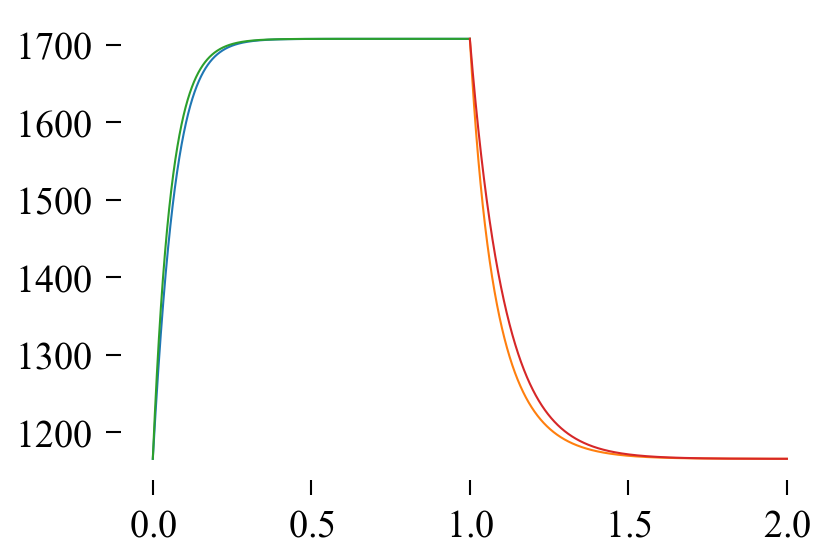

In [21]:
fig, ax = plt.subplots()
ax.plot(1e3 * t, n_fall_tau + delta_n0_tau + delta_n(t, tau_rise, R, -delta_n0_tau), label='-')
ax.plot(1e3 * (t + t.max()), n_fall_tau + delta_n(t, tau_fall, R, delta_n0_tau), label='+')
ax.plot(1e3 * t, n_fall_tau + delta_n0_tau + delta_n(t, tau_rise, 0 * R, -delta_n0_tau), label='0')
ax.plot(1e3 * (t + t.max()), n_fall_tau + delta_n(t, tau_fall, 0 * R, delta_n0_tau), label='0')


In [14]:
n_fall = (1 / tau_fall - S) / (2 * R)
n_fall

9.29022668153103

In [15]:
n_rise = 1 / (2 * R * tau_rise)
n_rise

9.712509712509712

In [7]:
n_rise - n_fall

14.069921883793654

In [8]:
1e6 * 1 / (2 * R * n_fall)

68.0

In [9]:
1e6 * 1 / (2 * R * n_rise)

67.0